# Case Globosales - Devoteam 


## 1. Understanding the data



First, we will import and organize the data. We will calculate the sales as the multiplication of quantity and unit price, and we will exclude the cases where quantity is negative, which means is not a purchase but a return. Note: there are cases with missing quantity , we are not excluding those from the analysis

In [5]:
import pandas as pd

df1 = pd.read_csv('ecommerce_data.csv',parse_dates=['InvoiceDate'])


#add the sales as the multiplication of quantity and unit price

df1['Sales'] = df1['Quantity'] *df1['UnitPrice']


#modify date

from datetime import datetime

df1['Date_modified']=df1['InvoiceDate'].apply(lambda x : x.replace(day=1)).dt.date

df1['Date_org']=pd.to_datetime(df1['InvoiceDate']).dt.date

df1['Year']=df1['InvoiceDate'].dt.year

df1['Week']=df1['InvoiceDate'].dt.isocalendar().week

#not include quantity -1 (returns)

df= df1[df1["Quantity"]>0]

print(df.head())


          InvoiceDate InvoiceNo StockCode                 Description  \
1 2011-12-09 09:07:00    581480     23355  HOT WATER BOTTLE KEEP CALM   
2 2011-12-07 12:55:00    581132       NaN                         NaN   
3 2011-06-23 14:11:00    557892       NaN                         NaN   
4 2011-01-25 14:01:00    542115     84992                         NaN   
5 2011-12-01 11:51:00    580024     35964                         NaN   

   Quantity        InvoiceDate.1  UnitPrice  CustomerID         Country  \
1      12.0  2011-12-09 09:07:00       4.95     14441.0  United Kingdom   
2       4.0  2011-12-07 12:55:00       4.95     17590.0  United Kingdom   
3       2.0  2011-06-23 14:11:00       6.35     14534.0  United Kingdom   
4       1.0  2011-01-25 14:01:00       2.08         NaN  United Kingdom   
5      36.0  2011-12-01 11:51:00       0.39     15172.0  United Kingdom   

   Estore_id  Sales Date_modified    Date_org  Year  Week  
1         20  59.40    2011-12-01  2011-12-09  201

Understand sales per country and per store 

In [6]:
# Country with the highest sales 2011

df_2011=df[df['Year']==2011]
df2= df_2011.groupby('Country').sum()
print(df2.sort_values('Sales',ascending=False))


                Quantity  UnitPrice  CustomerID  Estore_id      Sales  \
Country                                                                 
United Kingdom   68144.0   24432.88  83199068.0     110567  126194.38   
Germany          13352.0    4627.79  12348422.0      16453   27697.20   
France           12113.0    8266.13   8517046.0      10802   26990.06   
EIRE              8501.0    9261.27   3703401.0       4496   25293.00   
Netherlands      14730.0     229.12    908052.0       1106   23383.24   
Australia         2706.0    2195.55    493195.0        524   10713.00   
Portugal            18.0    8698.16    230046.0        300    8698.16   
Switzerland       2486.0     770.97    541852.0        850    5679.02   
Italy               40.0     400.00    126100.0        160    1600.00   
Spain              588.0     102.44    479443.0        567    1139.23   
Belgium             51.0     185.70    186960.0        235     646.80   
Norway               6.0      27.00     74286.0    

In [7]:
# e-store with the highest sales 2011


df3= df_2011.groupby('Estore_id').sum()
print(df3.sort_values('Sales',ascending=False))




           Quantity  UnitPrice  CustomerID     Sales    Year  Week
Estore_id                                                         
1            6003.0    2613.81   3099669.0  13249.57  500739  7327
4            4242.0    4309.88   3571002.0  11484.26  587212  8536
31           4089.0    4861.26   3779397.0  11395.57  591234  8858
30           5626.0    1137.44   3414450.0  11108.81  542970  7344
7            5656.0    1054.06   3397011.0  10914.47  561069  7947
17           2957.0    5183.53   3668739.0  10831.03  579168  8447
12           3611.0    2717.69   3248472.0   9242.56  518838  7380
19           3359.0    2262.03   3743642.0   9058.10  581179  8385
8            5318.0    2680.00   3566676.0   8673.68  577157  8120
13           4787.0    1333.63   3570909.0   8666.83  557047  7902
6            7027.0    1301.85   3477967.0   8376.59  557047  7978
29           4752.0    1676.13   3371619.0   8276.52  526882  7536
21           3028.0    1569.46   3711956.0   7896.87  593245  

### Checking stationarity


Now we will check if the time series is statationary or if there is any trend or seasonality. Knowing this will allow us to choose the correct model for prediction. We will do it by looking at the plots of the time series and by checking more formally with the Dickey-Fuller test.

<AxesSubplot:xlabel='Date_modified', ylabel='Sales'>

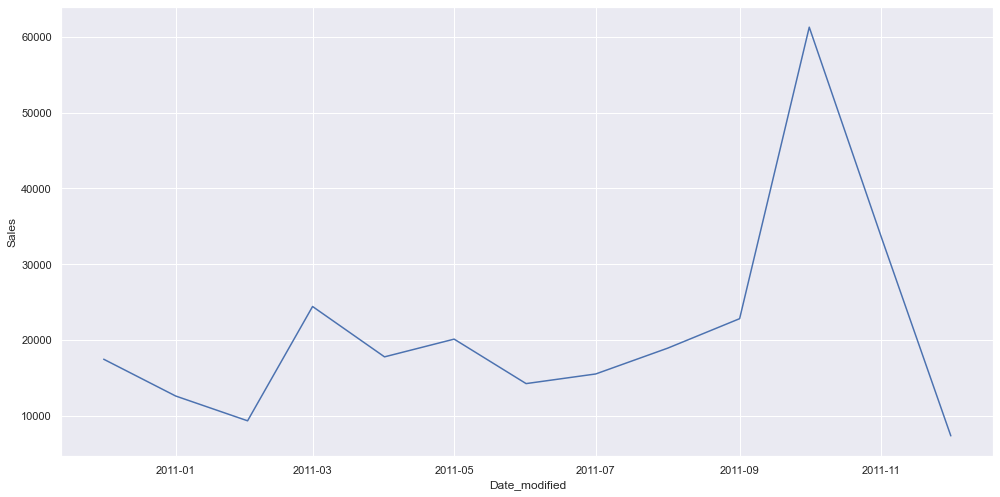

In [11]:
#monthly and yearly trend

import seaborn as sns
import matplotlib.pyplot as plt

df4= df.groupby('Date_modified').sum()

sns.set(rc={'figure.figsize':(16.7,8.27)})

sns.lineplot(x='Date_modified',y='Sales',data = df4)

<AxesSubplot:xlabel='Date_org', ylabel='Sales'>

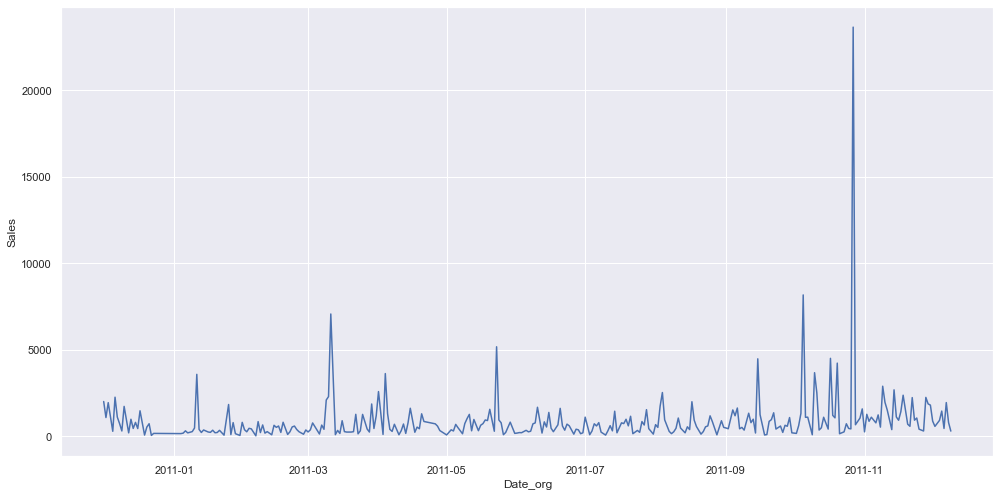

In [133]:
#daily trend


df5= df.groupby('Date_org').sum()

sns.lineplot(x='Date_org',y='Sales',data = df5)

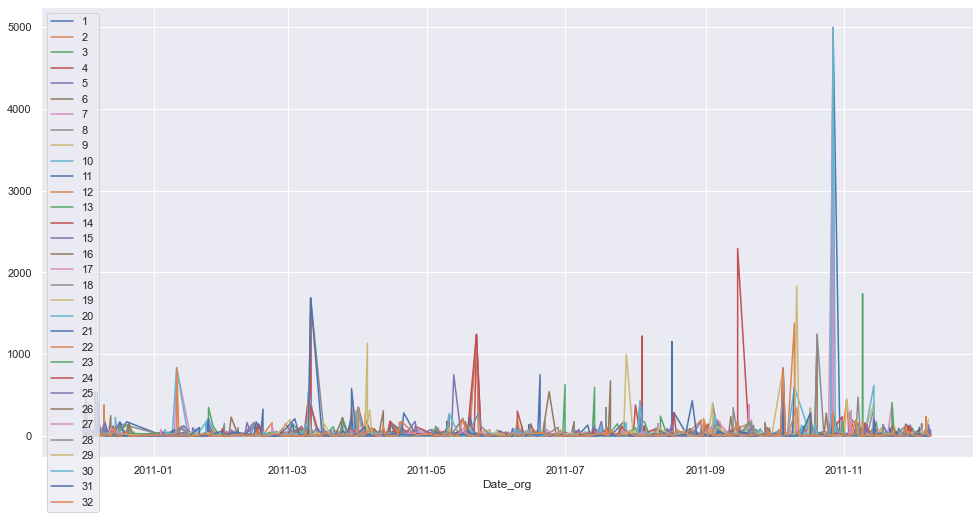

In [13]:
#trend per e-store

fig, ax = plt.subplots()
for label, grp in df.groupby('Estore_id'):
    grp.plot(x = 'Date_org', y = 'Sales',ax = ax, label = label)
    

<AxesSubplot:xlabel='Week', ylabel='Sales'>

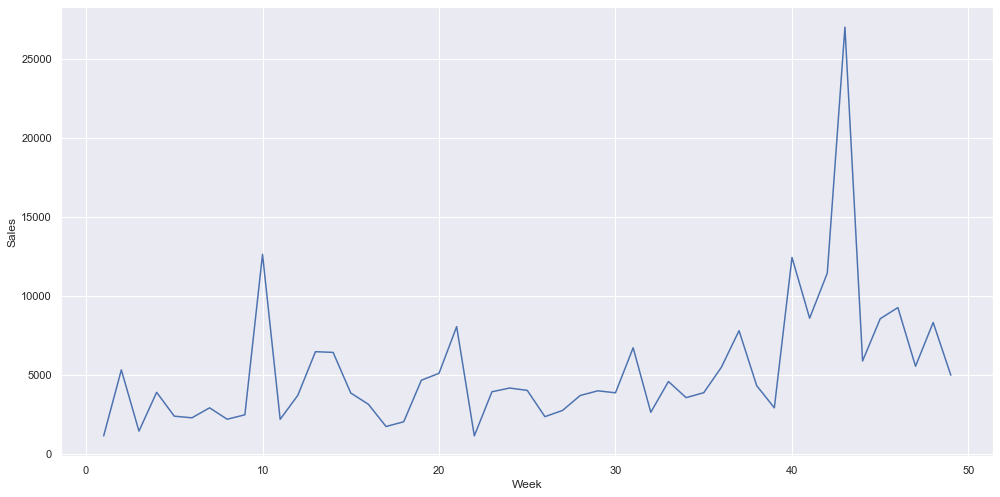

In [90]:
#trend per week


df6= df_2011.groupby('Week').sum()

sns.lineplot(x='Week',y='Sales',data = df6)



In [22]:
#check stationary with dickey fuller test

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['Sales'])

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

    
adfuller_test(df['Sales'])





ADF Test Statistic : -9.34441846343516
p-value : 8.623028956603517e-16
#Lags Used : 31
Number of Observations : 9451
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


 # 2. Splitting data
 
 
 
We will split the data such that everything before March 2011 will serve as test data, all other dates will be used as training data. This is because before March 2011 we observe a period that can be considered stationary, without seasonality

69
236


<AxesSubplot:xlabel='Date_org', ylabel='Sales'>

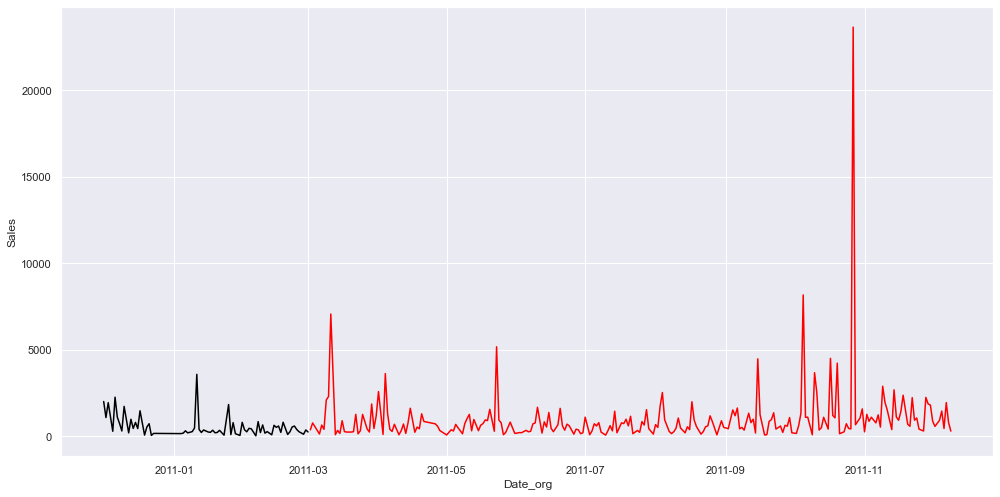

In [166]:
m=pd.to_datetime("2011-03-01", format='%Y-%m-%d')


df_pre=df[["Sales","Date_org"]]
df_arima= df_pre.groupby('Date_org').sum()


train= df_arima[df_arima.index > m]
test= df_arima[df_arima.index <= m]


print(test.size)
print(train.size)


sns.lineplot(x='Date_org',y='Sales',data = test, color = "black")
sns.lineplot(x='Date_org',y='Sales',data = train, color = "red")


# 3. Fitting ARIMA model


We will use the The Autoregressive Integrated Moving Average (ARIMA) model which combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The first step is to find the optimal parameters for the ARIMA model. We need to tune three parameters:

1. lagging (past values)
2. differencing (this is what makes non-stationary data stationary)
3. white noise (for modeling shock events). 

For now we will set those parameters with some initial values that are usually a good option. However, for a deeper analysis the optimial parameters should be found using grid search.


Now we will use those parameters to fit the ARIMA model

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  236
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2094.722
Date:                Tue, 08 Feb 2022   AIC                           4197.445
Time:                        21:00:59   BIC                           4211.283
Sample:                    03-01-2011   HQIC                          4203.024
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0382      0.174     -0.220      0.826      -0.379       0.303
ar.L2         -0.0337      0.235     -0.144      0.886      -0.494       0.426
ma.L1         -0.9653      0.037    -25.958      0.0

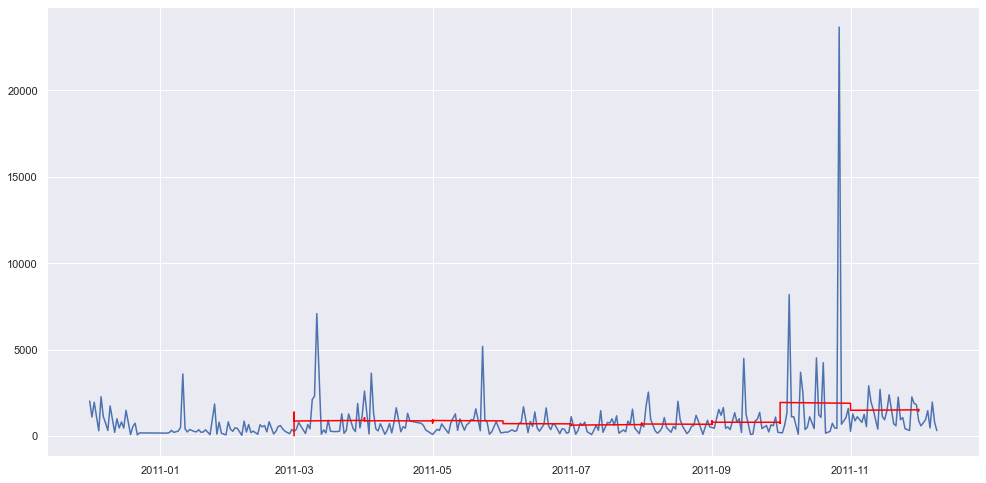

In [227]:
from statsmodels.tsa.arima.model import ARIMA


#import datetime as dt
#train.index = train.index.map(lambda x: datetime.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S"))


#train.index = pd.DatetimeIndex(train.index).to_timestamp('D')
#train.index = train.index.dt.to_timestamp('s').dt.strftime('%Y-%m-%d %H:%M:%S')
#train.index = dt.to_timestamp(train.index)
#print(train.index.dtype)


# fit model
model = ARIMA(train, order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


# plot fitted model

plt.plot(df_arima)
plt.plot(model_fit.fittedvalues,color="red")


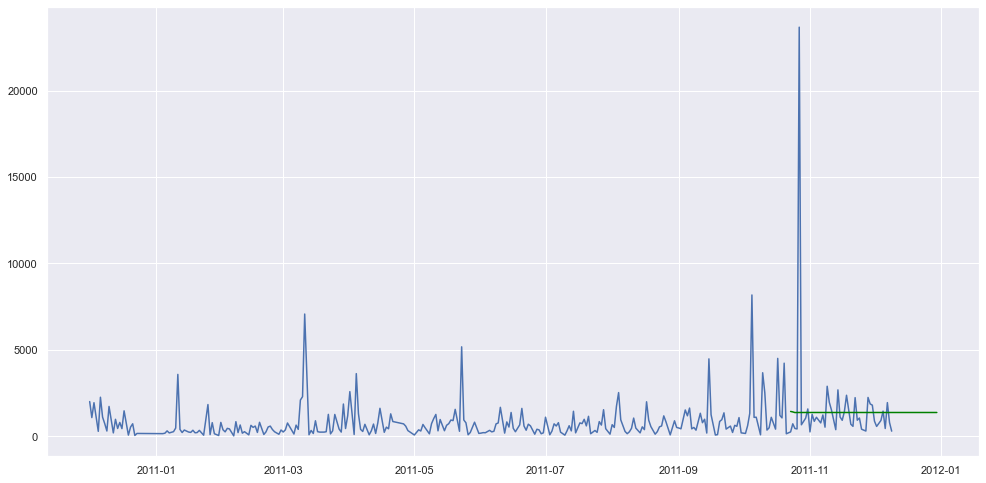

In [266]:
# make prediction


start = len(train)
end = len(train) + len(test) - 1

yhat = model_fit.predict(start, end, typ='levels')
#print(yhat)


plt.plot(df_arima)
plt.plot(yhat,color="green")




# 4. Evaluating the model

Now we will evaluate the performance of our model using the mean squared error 

In [282]:
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse


#arima_rmse = np.sqrt(mean_squared_error(test, yhat))
#print("RMSE: ",arima_rmse)

# Calculate root mean squared error
rmse= np.sqrt(mean_squared_error(test, yhat))
print("RMSE: ",rmse)

RMSE:  1015.530545055172
